<a href="https://colab.research.google.com/github/davidbundy77/planet-hunters/blob/master/TIC_335952150.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to lightkurve - downloading and plotting data 


### IMPORTANT - you can see and edit this colab notebook but if you want to save any changes that you have made you have to save it to your own drive (that way it will be yours and no one else can see your version). To save your own copy go to File -> Save a copy in Drive.


This notebook covers how to use the LightKurve package to download and plot a TESS lightcurve.

Notes:

- You need to run each cell. Do this by either pressing the 'run' button to the left of each cell (code box) or pressing shift+enter (this is what Nora does in the videos). 

- When you runa cell, a spinning circle will appear to the left of the cell. Once it has successfully completed running the code the star will turn into a number (often it runs so fast that you don't see the star).

- Text following a # is ignored by the code, so all comments are shown following # (except in this cell because I made this into a text cell)

In [ ]:
# you need to first install the lightkurve module (this is only done for this notebook  - nothing is downloaded onto your computer)
# this might take a moment so just let it run
%matplotlib inline
!pip install lightkurve

     |████████████████████████████████| 247 kB 5.5 MB/s 
     |████████████████████████████████| 4.4 MB 23.4 MB/s 
     |████████████████████████████████| 98 kB 8.1 MB/s 
     |████████████████████████████████| 41 kB 194 kB/s 
     |████████████████████████████████| 23.1 MB 1.5 MB/s 
     |████████████████████████████████| 802 kB 61.9 MB/s 
     |████████████████████████████████| 54 kB 2.5 MB/s 
     |████████████████████████████████| 3.5 MB 41.9 MB/s 
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11376 sha256=d58cf52621ce5318a46044ba4171d9c6e876cf1fe3d36fc9994332d6d4ab62b7
  Stored in directory: /root/.cache/pip/wheels/93/08/0c/1b9866c35c8d3f136d100dfe88036a32e0795437daca089f70
  Created wheel for memoization: filename=memoization-0.4.0-py3-none-any.whl size=50466 sha256=a4c80fcc84de7f56d7e061bb1765c10337ad24244fa1a8241e776f7a725a9b0f
  Stored in directory: /root/.cache/pip/wheels/38/f7/65/161985e7311dd484a23b3a5c9149995dbf11db6cede602e7ef
  Created wheel for okt

In [ ]:
# This cell simply imports the modules that you need for this work in this notebook
# this won't work unless you ran the cell above!
import lightkurve as lk
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# define TIC e.g. TIC 284475976 (WASP-48 b)
# make sure to put quotation marks ('' or "") around it (the font should change to red)
# !!! change the TIC id to look at a different target

TIC = 'TIC 335952150' # !! CHANEG THIS to run code for a different TIC ID

In [ ]:
# use lightkurve to see what (SPOC) data is available
sector_data = lk.search_lightcurve(TIC, author='SPOC')

In [ ]:
# print the results
sector_data

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 24,2020,SPOC,120,335952150,0.0
1,TESS Sector 40,2021,SPOC,120,335952150,0.0
2,TESS Sector 41,2021,SPOC,120,335952150,0.0


In [ ]:
# for this example, there are two sectors available, sector 23 and 26. Let's just look at one of those, sector 23.
# this command is the same as the above one, but the sector = 23 has now been defined
# !!! change the sector when looking at a different target

sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 41)  # !! CHANEG THIS (see below)

'''
(this is a comment and not code - for longer comments you can use tripple quotation marks)

note, there are a number of ways to select what sectors you want to look at. First check what sectors are available using:

print (lk.search_lightcurve(TIC, author = 'SPOC'))

this will print the available sectors for a given target for you. You can then select them using: 

1. a range of sectors using'[start, end]': 'lk.search_lightcurve(TIC, author = 'SPOC')[0:9]'
2. listing the sectors you want: 'lk.search_lightcurve(TIC, author = 'SPOC', sector = [5,6,8]'). (the square brackets are important!)
3. a single sector: 'lk.search_lightcurve(TIC, author = 'SPOC', sector = 5')
4. the first available secor: 'lk.search_lightcurve(TIC, author = 'SPOC')[0]'
5. all of the available data: 'lk.search_lightcurve(TIC, author = 'SPOC')'
'''

"\n(this is a comment and not code - for longer comments you can use tripple quotation marks)\n\nnote, there are a number of ways to select what sectors you want to look at. First check what sectors are available using:\n\nprint (lk.search_lightcurve(TIC, author = 'SPOC'))\n\nthis will print the available sectors for a given target for you. You can then select them using: \n\n1. a range of sectors using'[start, end]': 'lk.search_lightcurve(TIC, author = 'SPOC')[0:9]'\n2. listing the sectors you want: 'lk.search_lightcurve(TIC, author = 'SPOC', sector = [5,6,8]'). (the square brackets are important!)\n3. a single sector: 'lk.search_lightcurve(TIC, author = 'SPOC', sector = 5')\n4. the first available secor: 'lk.search_lightcurve(TIC, author = 'SPOC')[0]'\n5. all of the available data: 'lk.search_lightcurve(TIC, author = 'SPOC')'\n"

In [ ]:
# print the results again. Now we only see the sector 23 data
sector_data

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 41,2021,SPOC,120,335952150,0.0


In [ ]:
# download the data 
lc= sector_data.download()

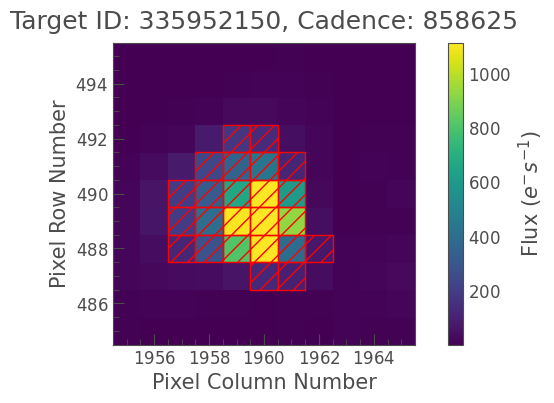

In [ ]:
search_result = lk.search_targetpixelfile(TIC, author="SPOC", sector=41) # CHANGE the sector for different targets
tpf = search_result.download()
tpf.plot(aperture_mask='pipeline')

(2421.0, 2422.5)

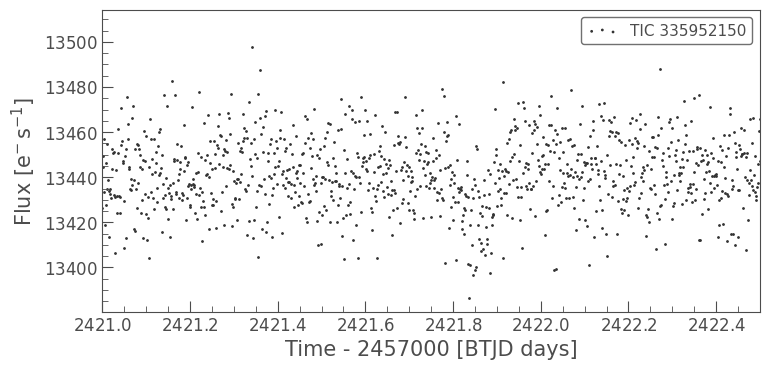

In [ ]:
# plot the data
lc.scatter()
plt.xlim(2421, 2422.5)

(2421.0, 2422.5)

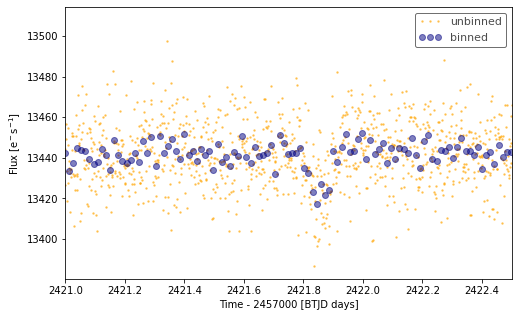

In [ ]:
fig, ax = plt.subplots(figsize = (8,5))

lc.plot(ax = ax, marker = '.', linewidth = 0, color = 'orange', alpha = 0.5, markersize = 3, label = 'unbinned')
lc.bin(20/24/60).plot(ax = ax, marker = 'o', linewidth = 0, color = 'navy', alpha = 0.5, markersize = 6, label = 'binned')

plt.xlim(2421, 2422.5)

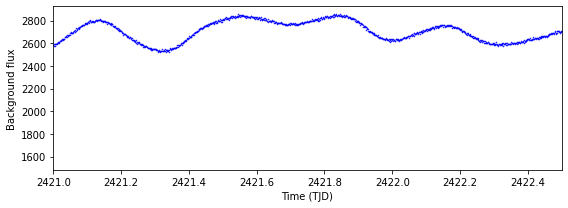

In [ ]:
# now that we've seen the lightcurve, let's try plotting the backrgound flux

# set up the plotting region
fig, ax = plt.subplots(figsize = (8,3))

# plot the time vs the backrgound flux (see above cell)
plt.plot(lc.time.value, lc.sap_bkg.value, color = 'blue', lw = 0, marker = '.', ms = 1)

plt.ylabel("Background flux") # label the axes
plt.xlabel("Time (TJD)")
plt.tight_layout()
plt.xlim(2421, 2422.5)
plt.show()

In [ ]:
'''
This cell contains the 'function' that plots the in and out of transit flux comparison plots! 
You don't need to do anything with this code but you do have to RUN THIS CELL for the test to work! 
'''

def plot_in_out_TPF(tpf,  T0):

    tpf_list = [tpf.flux.value]
    t_list = [tpf.time.value]
    T0_list = [T0]
    
    plt.figure(figsize=(9,2.5*len(T0_list)))

    plt.tight_layout()

    count = 0 # keep track of how many images have been plotted to that they appear on a subgrid of plots which has three columns

    # loop through all of the list of PCA corrected flux vs time arrays for each marked transit-event
    for idx, tpf_filt in enumerate(tpf_list): # idx is for each maked transit-event

        T0 = T0_list[idx] # the time of the transit-like event
        t = t_list[idx] # the time array

        intr = abs(T0-t) < 0.25  # create a mask of the in transit times
        oot = (abs(T0-t) < 0.5) * (abs(T0-t) < 0.3)  # create a mask of the out of transit times
        img_intr = tpf_filt[intr,:,:].sum(axis=0)/float(intr.sum()) # apply the masks and normalize the flux
        img_oot = tpf_filt[oot,:,:].sum(axis=0)/float(oot.sum())
        img_diff = img_oot-img_intr # calculate the diffefence image (out of transit minus in-transit)

        
        # ---- PLOT -------

        # in transit
        count += 1 # add to the count before each plot
        plt.subplot(len(T0_list), 3, count)
        plt.axis('off')
        plt.imshow(img_intr, cmap=plt.cm.viridis, origin = 'lower')
        plt.colorbar()
        plt.title("t = {} days \n In Transit Flux (e-/candence)".format(T0), fontsize = 9 )

        # out of transit
        count += 1
        plt.subplot(len(T0_list), 3, count)
        plt.axis('off')
        plt.imshow(img_oot, cmap=plt.cm.viridis, origin = 'lower')
        plt.colorbar()
        plt.title("Out of Transit Flux (e-/candence)", fontsize = 9 )

        # out of transit minus in-transit
        count += 1
        plt.subplot(len(T0_list), 3, count)
        plt.axis('off')
        plt.imshow(img_diff, cmap=plt.cm.viridis, origin = 'lower')
        plt.colorbar()
        plt.title("Difference Flux (e-/candence)", fontsize = 9 )


    plt.subplots_adjust(wspace = 0)
    plt.tight_layout()

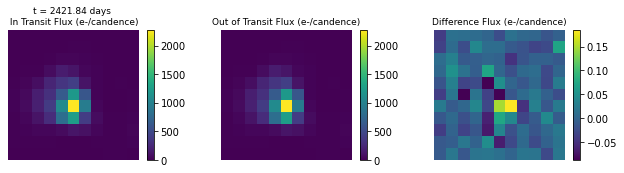

In [ ]:

'''we can now use the function that was defined above to plot the test for a given target
(we'll start with the target that we already downlaoded data for above)

okay, so for the code to work all we need to do is define the time of the transit event!
'''

transit_time = 2421.84 # time of transit (change this for another target)

# now run the function
plot_in_out_TPF(tpf, transit_time)

In [ ]:
def plot_pixel_level_LC(tpf, transit_time, ql = False):
    
    transit_list = [transit_time]
    t_list = [tpf.time.value]
    tpf_list = [tpf.flux.value]
    bkg_list = [np.nanmean(tpf.flux.value,axis = 0)]
    arrshape_list = [tpf.flux.shape]

    # loop through the transits and make plot for each ( only the first is currently displayed in the pdf report)
    for idx, X1_original in enumerate(tpf_list):

        bkg = np.flip(bkg_list[idx], axis = 0)
        arrshape = arrshape_list[idx]
        peak = transit_list[idx]
        tpf = tpf_list[idx]
        
        s = X1_original.shape
        X1 = X1_original.reshape(s[0],s[1]*s[2])
        
        T0 = transit_list[idx] # the time of the transit-like event
        t = t_list[idx] # the time array

        intr = abs(T0-t) < 0.25  # create a mask of the in transit times
        oot = (abs(T0-t) < 0.5) * (abs(T0-t) < 0.3)  # create a mask of the out of transit times
        

        fig, ax = plt.subplots(arrshape[1], arrshape[2], sharex = True, sharey = False, gridspec_kw={'hspace': 0 ,'wspace': 0}, figsize=(5.5,5.5))

        plt.tight_layout()

        # see if the backrgound of this plot can be the average pixel flux (if there are too many nans this will fail and the background will just be black which is also okay)
        try:
            color = plt.cm.viridis(np.linspace(0, 1,int(np.nanmax(bkg))-int(np.nanmin(bkg))+1))
            simplebkg = False
        except:
            simplebkg = True

        for i in range(0,arrshape[1]):
            ii = arrshape[1]-1-i # we want to plot this such that the pixels increase from left to right and bottom to top

            for j in range(0,arrshape[2]):

                apmask = np.zeros(arrshape[1:], dtype=np.int)
                apmask[i,j] = 1
                apmask = apmask.astype(bool)
                
                flux = X1[:,apmask.flatten()].sum(axis=1)

                m = np.nanmedian(flux[oot])

                normalizedflux = flux/m

                # bin the data
                f1 = normalizedflux
                time = t


                binfac = 7

                N       = len(time)
                n       = int(np.floor(N/binfac)*binfac)
                X       = np.zeros((2,n))
                X[0,:]  = time[:n]
                X[1,:]  = f1[:n]
                Xb      = rebin(X, (2,int(n/binfac)))

                # binned data
                time_binned    =    np.array(Xb[0])
                flux_binned    =   np.array(Xb[1])

                
                # create a mask that only looks at the times cut around the transit-event
                timemask = (time_binned < peak+1.5) & (time_binned > peak-1.5)

                time_binned = time_binned[timemask]
                flux_binned = flux_binned[timemask]

                # ----------
                # fit a spline to the cut-out of each pixel LC in order to flatten it
                p = np.poly1d(np.polyfit(time_binned, flux_binned, 3))
                flux_binned = flux_binned/p(time_binned)
                # ----------

                intr = abs(peak-time_binned) < 0.1

                if simplebkg == True:
                    ax[ii, j].set_facecolor(color = 'k')
                    linecolor = 'w'
                    transitcolor = 'gold'
                else:
                    ax[ii, j].set_facecolor(color = color[int(bkg[ii,j])-int(np.nanmin(bkg))])

                    if int(bkg[ii,j])-abs(int(np.nanmin(bkg))) > ((np.nanmax(bkg))-abs(int(np.nanmin(bkg))))/2:
                        linecolor = 'k'
                        transitcolor = 'orangered'
                    else:
                        linecolor = 'w'
                        transitcolor = 'gold'


                ax[ii, j].plot(time_binned,flux_binned, color = linecolor, marker = '.', markersize=1, lw = 0)
                ax[ii, j].plot(time_binned[intr],flux_binned[intr], color = transitcolor, marker = '.', markersize=1, lw = 0)

                # get rid of ticks and ticklabels
                ax[ii,j].set_yticklabels([])
                ax[ii,j].set_xticklabels([])
                ax[ii,j].set_xticks([])
                ax[ii,j].set_yticks([])

        # ------------------

        print ("done.\n")
        # ------------------

        # label the pixels

        fig.text(0.5,0.01, "column (pixel)", ha='center', fontsize = 13)
        fig.text(0.01, 0.5, "row (pixel)", va='center', rotation='vertical', fontsize = 13)

        # - - - - - - - - - -

        plt.subplots_adjust(top=0.95, right = 0.99, bottom = 0.04, left = 0.04)

        plt.suptitle(r"T0 = {} $\pm$ 1.5 d".format(peak ),y=0.98, fontsize = 12)
        plt.xlim(peak-1.5,peak+1.5)
        plt.show()
        
        
def rebin(arr,new_shape):

    ''''
    function used to rebin the data
    '''
    shape = (new_shape[0], arr.shape[0] // new_shape[0],
        new_shape[1], arr.shape[1] // new_shape[1])
    return arr.reshape(shape).mean(-1).mean(1)

done.



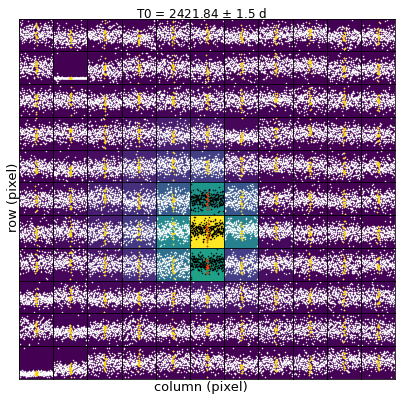

In [ ]:
'''we can now use the function that was defined above to plot the test for a given target
(we'll start with the target that we already downlaoded data for above)

Okay, so for the code to work all we need to do is define the time of the transit event!

'''

transit_time = 2421.84

plot_pixel_level_LC(tpf, transit_time)